In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torch.utils.data import DataLoader
from models.cycleGAN import CycleGANModel
from models.enlighten import EnlightenGAN
from data.custom_image_dataset import CustomImageDataset
from configs.option import Option

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:

model_1 = EnlightenGAN(use_src=True, device=device, parallelism=True)
model_2 = EnlightenGAN(use_src=True, device=device)

model_1.load_model("./checkpoints/enlightenGAN/demo")
model_2.load_model("./checkpoints/enlightenGAN/training_7/iter_15000")

In [4]:
dataset = CustomImageDataset(
    img_dir="./datasets/light_enhancement",
    opt=Option(phase="test")
)

batch_size = 3
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [5]:
data = next(iter(dataloader))

In [6]:
def showImage(paths, row=1, col=1, figsize=(10,10)):
    plt.subplots(row, col, figsize=figsize)

    for i in range(row):
        for j in range(col):
            pos = col * i + j
            idx = pos % len(paths)
            path, name = paths[idx]
            
            plt.subplot(row, col, pos+1)
            plt.imshow(mpimg.imread(path))
            plt.title(name, color="white")
            plt.axis('off')

    plt.show()
    print("-" * 8 * figsize[0])

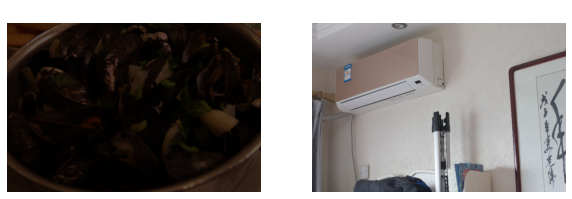

--------------------------------------------------------------------------------


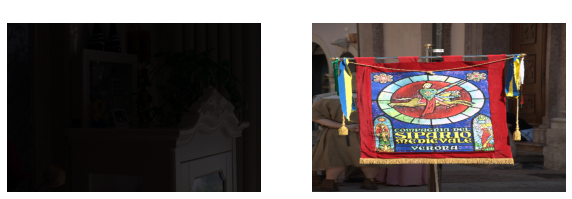

--------------------------------------------------------------------------------


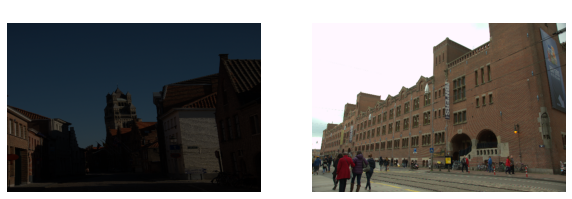

--------------------------------------------------------------------------------


In [7]:
for i in range(batch_size):
    showImage([(data["path_A"][i], "Image X"), (data["path_B"][i], "Image Y")], row=1, col=2)

In [8]:
model_1.set_input(data)
paths = model_1.test(save_dir="./results/enlightenGAN/test_1/")

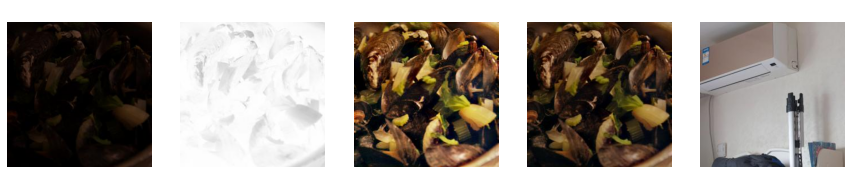

------------------------------------------------------------------------------------------------------------------------


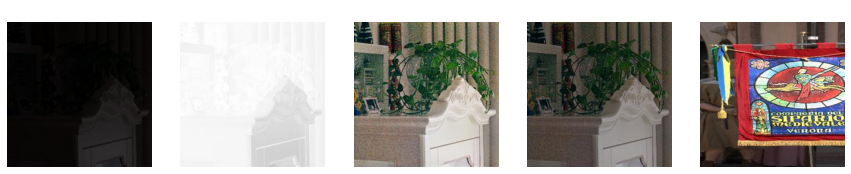

------------------------------------------------------------------------------------------------------------------------


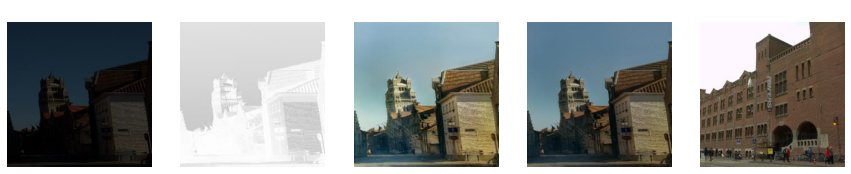

------------------------------------------------------------------------------------------------------------------------


In [9]:
n_images = 5

for i in range(batch_size):
    showImage(paths[i * n_images: (i+1) * n_images], 1, 5, figsize=(15,10))

In [10]:
model_2.set_input(data)
paths = model_2.test(save_dir="./results/enlightenGAN/test_2")

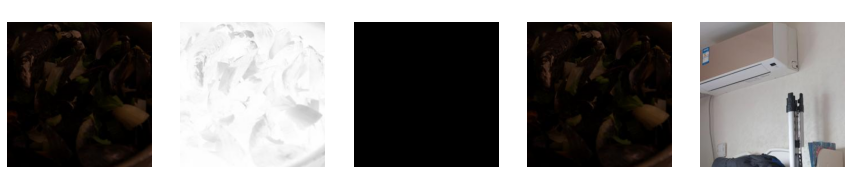

------------------------------------------------------------------------------------------------------------------------


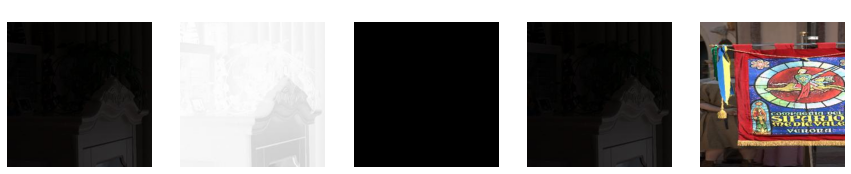

------------------------------------------------------------------------------------------------------------------------


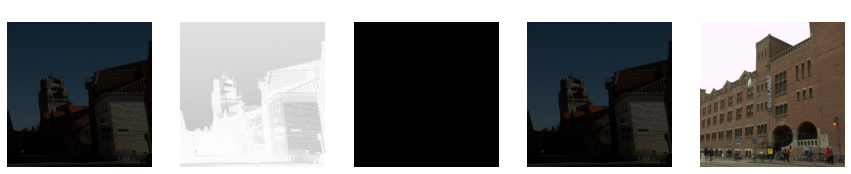

------------------------------------------------------------------------------------------------------------------------


In [11]:
n_images = 5

for i in range(batch_size):
    showImage(paths[i * n_images: (i+1) * n_images], 1, 5, figsize=(15,10))